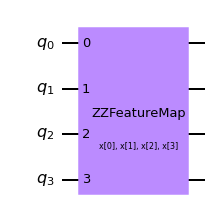

In [1]:
from qiskit.circuit.library import ZZFeatureMap  # can also drop .data_preparation

data_preparation = ZZFeatureMap(4)
data_preparation.draw(output='mpl')

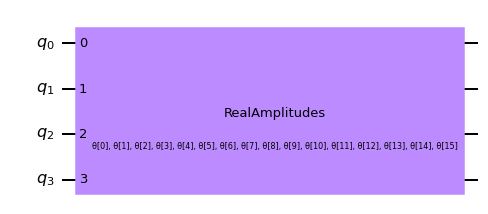

In [2]:
from qiskit.circuit.library import RealAmplitudes  # can also drop .n_local

classifier = RealAmplitudes(4)
classifier.draw(output='mpl')

In [3]:
pip install blueqat

     --------------------------------------- 62.9/62.9 KB 37.0 kB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     -------------------------------------- 353.6/353.6 KB 3.2 MB/s eta 0:00:00
     -------------------------------------- 321.4/321.4 KB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 4.6 MB/s eta 0:00:00
     -------------------------------------- 55.8/55.8 KB 323.4 kB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\shrey\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [9]:
import numpy as np
from blueqat import Circuit
from blueqat.pauli import X, Y, Z, I
from blueqat.vqe import AnsatzBase, Vqe
class OneQubitAnsatz(AnsatzBase):
  def __init__(self, hamiltonian):
    super().__init__(hamiltonian.to_expr(), 4)
    self.step = 1  
  def get_circuit(self, params):
    a, b, c, d = params
    return Circuit().ry(a)[0].rz(b)[0].ry(c)[1].rz(d)[1]
    
# hamiltonian is important
h = -Z(0) - Z(0)*Z(1)
runner = Vqe(OneQubitAnsatz(h))
result = runner.run()
print('Result by VQE')
print(runner.ansatz.get_energy(result.circuit, runner.sampler))

TypeError: unsupported operand type(s) for @: 'csc_matrix' and 'Counter'

In [12]:
import numpy as np
from blueqat import Circuit
from blueqat.pauli import X, Y, Z, I
from blueqat.pauli import qubo_bit as q
from blueqat.vqe import AnsatzBase, Vqe
class QubitAnsatz(AnsatzBase):
  def __init__(self, hamiltonian):
    super().__init__(hamiltonian, 4)
    self.step = 1  
def get_circuit(self, params):
    a, b, c, d = params
    return Circuit().ry(a)[0].rz(b)[0].ry(c)[1].rz(d)[1]
    
h = -3*q(0)-3*q(1)-2*q(0)*q(1)
h = h.to_expr().simplify()
runner = Vqe(QubitAnsatz(h))
result = runner.run()
print('Result by VQE')
print(runner.ansatz.get_energy(result.circuit, runner.sampler))# Hamiltonian to matrix
mat = h.to_matrix()# Calculate by numpy
print('Result by numpy')
print(np.linalg.eigh(mat)[0][0])

NotImplementedError: 

In [13]:
from qiskit.opflow import Z, I

num_qubits = 4
hamiltonian = (Z ^ Z) ^ (I ^ (num_qubits - 2))

In [14]:
target_energy = -1

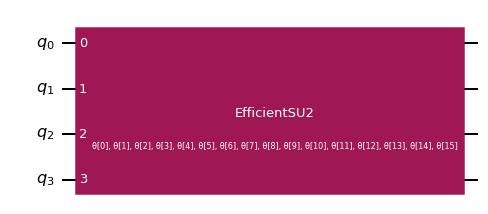

In [31]:
from qiskit.circuit.library import EfficientSU2

# the rotation gates are chosen randomly, so we set a seed for reproducibility
ansatz = EfficientSU2(num_qubits, reps=1, entanglement='linear', insert_barriers=True) 
ansatz.draw('mpl', style='iqx')
#print(ansatz)

In [16]:
import numpy as np
from qiskit.algorithms.optimizers import SPSA

optimizer = SPSA(maxiter=50)

np.random.seed(10)  # seed for reproducibility
initial_point = np.random.random(ansatz.num_parameters)

In [17]:
intermediate_info = {
    'nfev': [],
    'parameters': [],
    'energy': [],
    'stddev': []
}

def callback(nfev, parameters, energy, stddev):
    intermediate_info['nfev'].append(nfev)
    intermediate_info['parameters'].append(parameters)
    intermediate_info['energy'].append(energy)
    intermediate_info['stddev'].append(stddev)

In [18]:


from qiskit.providers.basicaer import QasmSimulatorPy  # local simulator
from qiskit.algorithms import VQE

local_vqe = VQE(ansatz=ansatz,
                optimizer=optimizer,
                initial_point=initial_point,
                quantum_instance=QasmSimulatorPy(),
                callback=callback)



In [19]:


local_result = local_vqe.compute_minimum_eigenvalue(hamiltonian)



In [20]:


print('Eigenvalue:', local_result.eigenvalue)
print('Target:', target_energy)



Eigenvalue: (-0.998046875+0j)
Target: -1


In [21]:
print('Mean error:', np.mean(intermediate_info['stddev']))

Mean error: 0.01840833150552532


In [23]:
'''from qiskit import IBMQ

IBMQ.load_account()
provider = IBMQ.get_provider(project='qiskit-runtime')  # replace by your designated provider'''

"from qiskit import IBMQ\n\nIBMQ.load_account()\nprovider = IBMQ.get_provider(project='qiskit-runtime')  # replace by your designated provider"

In [24]:
intermediate_info = {
    'nfev': [],
    'parameters': [],
    'energy': [],
    'stddev': []
}

def callback(nfev, parameters, energy, stddev):
    intermediate_info['nfev'].append(nfev)
    intermediate_info['parameters'].append(parameters)
    intermediate_info['energy'].append(energy)
    intermediate_info['stddev'].append(stddev)

In [25]:


measurement_error_mitigation = True



In [26]:
from qiskit_nature.runtime import VQEProgram

# in this first release, the optimizer must be specified as dictionary
optimizer = {'name': 'SPSA',
             'maxiter': 50}

runtime_vqe = VQEProgram(ansatz=ansatz,
                         optimizer=optimizer,
                         initial_point=initial_point,
                         provider=provider,
                         backend=backend,
                         shots=1024,
                         measurement_error_mitigation=measurement_error_mitigation,
                         callback=callback)

ModuleNotFoundError: No module named 'qiskit_nature'